In [109]:
from os import listdir
import xarray
import rasterio
import geopandas as gp
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [150]:
DATA_OUTPUT_DIR = "../troubled_waters_data/output_netcdf/"
IMG_OUTPUT_DIR = "../troubled_waters_data/model_mean_imgs/"
metrics = ['frac_extreme', 'max_threeday_precip', 'nov_mar_percent',
            'rainfall_ratio', 'num_ros_events', 'norm_rain_on_snow',
            'SWE_total', 'et']
norms = [Normalize(vmin=-20, vmax=20), Normalize(vmin=-100, vmax=100), Normalize(vmin=-20, vmax=20),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50)]

def preprocess_metric(metric_ds):
    # Interpolate to a higher resolution
    new_lat = np.linspace(metric_ds.lat[0], metric_ds.lat[-1], metric_ds.lat.size*8)
    new_lon = np.linspace(metric_ds.lon[0], metric_ds.lon[-1], metric_ds.lon.size*8)
    metric_ds = metric_ds.interp(lat=new_lat, lon=new_lon)
    # Adjust coordinates to match the shapefile coordinates
    metric_ds = metric_ds.assign_coords(lon=(((metric_ds.lon + 180) % 360) - 180)).sortby('lon')
    # Set spatial dimensions for data
    metric_ds.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
    # Specify CRS projection to match shapefile data
    metric_ds.rio.write_crs("epsg:4326", inplace=True)
    return metric_ds

metric_means = {}

for rcp in ["RCP85", "RCP45"]:
    for met_index, metric in enumerate(metrics):
        metric_ds = xarray.open_dataset(f"{DATA_OUTPUT_DIR}{metric}_{rcp}.nc")
        model_mean = metric_ds.to_array(dim='tmp').mean('tmp')
        model_mean = model_mean.where(model_mean != np.nan)
        new_lat = np.linspace(model_mean.lat[0], model_mean.lat[-1], model_mean.lat.size*2)
        new_lon = np.linspace(model_mean.lon[0], model_mean.lon[-1], model_mean.lon.size*2)
        vals = model_mean.interp(lat=new_lat, lon=new_lon).values
        
        img = np.zeros((vals.shape[0], vals.shape[1], 4))
        cmap = cm.get_cmap('PuOr')
        norm = norms[met_index]
        for i in range(vals.shape[0]):
            for j in range(vals.shape[1]):
                value = cmap(norm(vals[i, j]))        
                img[i, j] = np.array((value[0], value[1], value[2], (1-np.isnan(vals[i, j])*1)))
        
        im = Image.fromarray((np.flip(np.rot90(img, 2), axis=1) * 255).astype(np.uint8))
        im.save(f"{IMG_OUTPUT_DIR}{metric}_{rcp}.png")

C:\Users\Cameron\anaconda3\envs\ut-ucs\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\Cameron\anaconda3\envs\ut-ucs\lib\site-packages\scipy\interpolate\interpolate.py:633: RuntimeWarning: invalid value encountered in add
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\Users\Cameron\anaconda3\envs\ut-ucs\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\Cameron\anaconda3\envs\ut-ucs\lib\site-packages\scipy\interpolate\interpolate.py:633: RuntimeWarning: invalid value encountered in add
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\Users\Cameron\anaconda3\envs\ut-ucs\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\Cameron\anacond

In [179]:
metric_ds = xarray.open_dataset(f"{DATA_OUTPUT_DIR}frac_extreme_RCP85.nc")
metric_ds = metric_ds.assign_coords(lon=(((metric_ds.lon + 180) % 360) - 180)).sortby('lon')
# Originals:
lats = np.array([43.71875, 31.59375])
lons = np.array([-124.53125, -113.40625])


In [194]:
lats = np.array([43.71875, 31.59375-0.15]) - 0.08
lons = np.array([(-124.53125)-0.1, (-113.40625)+0.1])

print(f"[{lons[0]}, {lats[0]}],", end="")
print(f"[{lons[1]}, {lats[0]}],", end="")
print(f"[{lons[1]}, {lats[1]}],", end="")
print(f"[{lons[0]}, {lats[1]}]")

[-124.63125, 43.63875],[-113.30625, 43.63875],[-113.30625, 31.363750000000003],[-124.63125, 31.363750000000003]


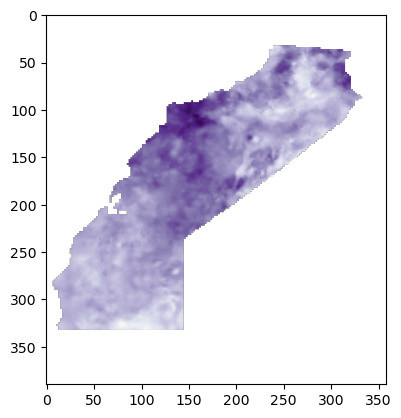

In [156]:
vals = metric_means["frac_extreme_RCP85"].values
img = np.zeros((vals.shape[0], vals.shape[1], 4))

cmap = cm.get_cmap('PuOr')
norm = norms[0]

for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        value = cmap(norm(vals[i, j]))        
        img[i, j] = np.array((value[0], value[1], value[2], (1-np.isnan(vals[i, j])*1)))

plt.imshow(img)

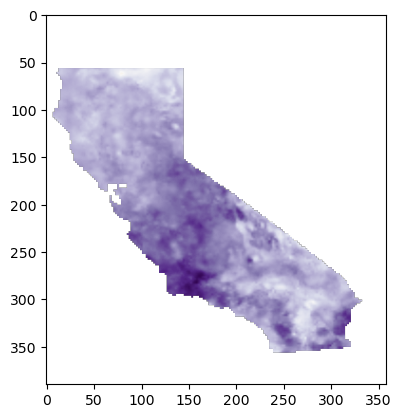

In [167]:
plt.imshow(np.flip(np.rot90(img, 2), axis=1))

In [171]:
import xarray
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from PIL import Image


DATA_OUTPUT_DIR = "../troubled_waters_data/output_netcdf/"
IMG_OUTPUT_DIR = "../troubled_waters_data/model_mean_imgs/"
metrics = ['frac_extreme', 'max_threeday_precip', 'nov_mar_percent',
            'rainfall_ratio', 'num_ros_events', 'norm_rain_on_snow',
            'SWE_total', 'et']
norms = [Normalize(vmin=-20, vmax=20), Normalize(vmin=-100, vmax=100), Normalize(vmin=-20, vmax=20),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50)]

def preprocess_metric(metric_ds):
    # Interpolate to a higher resolution
    new_lat = np.linspace(metric_ds.lat[0], metric_ds.lat[-1], metric_ds.lat.size*8)
    new_lon = np.linspace(metric_ds.lon[0], metric_ds.lon[-1], metric_ds.lon.size*8)
    metric_ds = metric_ds.interp(lat=new_lat, lon=new_lon)
    # Adjust coordinates to match the shapefile coordinates
    metric_ds = metric_ds.assign_coords(lon=(((metric_ds.lon + 180) % 360) - 180)).sortby('lon')
    # Set spatial dimensions for data
    metric_ds.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
    # Specify CRS projection to match shapefile data
    metric_ds.rio.write_crs("epsg:4326", inplace=True)
    return metric_ds

metric_means = {}

for rcp in ["RCP85", "RCP45"]:
    for met_index, metric in enumerate(metrics):
        print(f"{metric}_{rcp}")
        metric_ds = xarray.open_dataset(f"{DATA_OUTPUT_DIR}{metric}_{rcp}.nc")
        model_mean = metric_ds.to_array(dim='tmp').mean('tmp')*100
        model_mean = model_mean.where(model_mean != np.nan)
        new_lat = np.linspace(model_mean.lat[0], model_mean.lat[-1], model_mean.lat.size*2)
        new_lon = np.linspace(model_mean.lon[0], model_mean.lon[-1], model_mean.lon.size*2)
        vals = model_mean.interp(lat=new_lat, lon=new_lon).values
        
        img = np.zeros((vals.shape[0], vals.shape[1], 4))
        cmap = cm.get_cmap('PuOr')
        norm = norms[met_index]
        for i in range(vals.shape[0]):
            for j in range(vals.shape[1]):
                value = cmap(norm(vals[i, j]))        
                img[i, j] = np.array((value[0], value[1], value[2], (1-np.isnan(vals[i, j])*1)))
        
        im = Image.fromarray((np.flip(np.rot90(img, 2), axis=1) * 255).astype(np.uint8))
        #im.save(f"{IMG_OUTPUT_DIR}{metric}_{rcp}.png")
        break

frac_extreme_RCP85
frac_extreme_RCP45


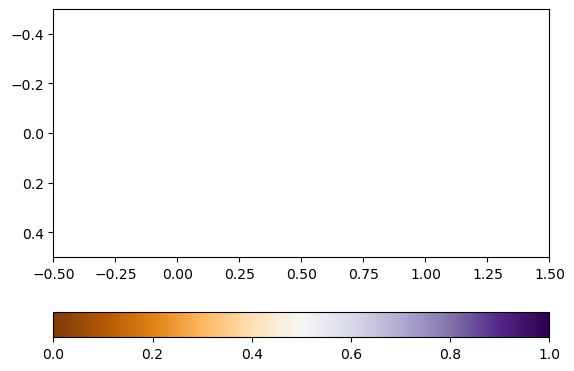

In [200]:
from matplotlib import pyplot as plt
import numpy as np

# create dummy invisible image
# (use the colormap you want to have on the colorbar)
img = plt.imshow(np.array([[0,1]]), cmap="PuOr")
img.set_visible(False)

plt.colorbar(orientation="vertical")

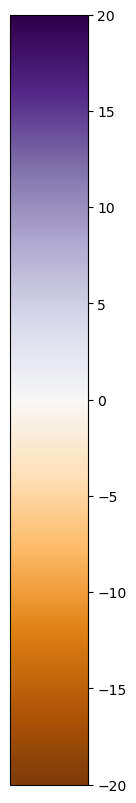

In [225]:
CB_OUTPUT_DIR = "../troubled_waters_data/colorbars/"
metrics = ['frac_extreme', 'max_threeday_precip', 'nov_mar_percent',
            'rainfall_ratio', 'num_ros_events', 'norm_rain_on_snow',
            'SWE_total', 'et']
norms = [Normalize(vmin=-20, vmax=20), Normalize(vmin=-100, vmax=100), Normalize(vmin=-20, vmax=20),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50),
        Normalize(vmin=-100, vmax=100), Normalize(vmin=-50, vmax=50)]


fig, ax = plt.subplots(1, 1, figsize=(1, 10), dpi=100)
#ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, norm=norms[0], orientation='vertical', cmap='PuOr')
fig.savefig("test.png", dpi=fig.dpi, bbox_inches='tight', pad_inches=0.2)

In [2]:
import xarray
REGION_DATA_OUTPUT_DIR = "../troubled_waters_data/output_region_netcdf/"
MEAN_IMG_DIR = "../troubled_waters_data/model_mean_imgs/"
CB_IMG_DIR = "../troubled_waters_data/colorbars/"
metrics = ['frac_extreme', 'max_threeday_precip', 'nov_mar_percent',
            'rainfall_ratio', 'num_ros_events', 'norm_rain_on_snow',
            'SWE_total', 'et']
region_labels = ["Groundwater Basins", "Counties", "Places", "Watersheds"]
regions = ["GWB", "COUNTIES", "PLACES", "WBD"]
regional_data = {}
for metric in metrics:
    for rcp in ["RCP45", "RCP85"]:
        for index, region in enumerate(regions):
            filename = f"{metric}_{rcp}_{region}"
            regional_data[filename] = xarray.open_dataset(f"{REGION_DATA_OUTPUT_DIR}{filename}.nc")
            regional_data[filename]["label"] = region_labels[index]
            

In [11]:
regional_data["frac_extreme_RCP45_WBD"].loc[{f"wbd_id":1}]

<xarray.Dataset>
Dimensions:     (model: 10)
Coordinates:
    wbd_id      int64 1
  * model       (model) object 'frac_extreme_ACCESS1-0' ... 'frac_extreme_MIR...
Data variables:
    wbd_name    object 'Honcut Creek'
    model_mean  (model) float64 0.0243 -0.01353 0.06376 ... 0.02673 0.1753
    model_std   (model) float64 0.02682 0.01832 0.007322 ... 0.0229 0.0329
    model_min   (model) float64 -0.01445 -0.05863 0.03117 ... -0.01883 0.1159
    model_max   (model) float64 0.09742 0.01313 0.07782 ... 0.06295 0.2258
    label       <U10 'Watersheds'